In [2]:
import numpy as np
import os
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt 
from IPython.display import display, clear_output

In [41]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

#     plt.xlim(-9., 5.)
#     plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

In [51]:
# 100 * 22 * 2 , 81
num_samples = 100
correct = np.genfromtxt(os.path.join("Dataset", "Correct_data.txt"), delimiter=',').reshape(num_samples, 22, 2, -1)
incorrect = np.genfromtxt(os.path.join("Dataset", "Incorrect_data.txt"), delimiter=',').reshape(num_samples, 22, 2, -1)

# correct = correct.transpose(0,3, 1, 2).reshape(-1, 22)
# correct = correct[:, 0, 0, :].reshape(num_samples, -1)
# print(correct.shape)

In [52]:
gmm = GaussianMixture(n_components=6).fit(correct)

ValueError: Found array with dim 4. Estimator expected <= 2.

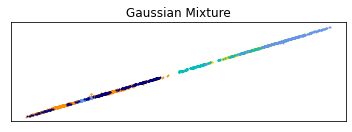

In [50]:
plot_results(correct, gmm.predict(correct), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')


In [ ]:
fig, ax = plt.subplots()
for i in range(81):
    ax.cla()
    ax.scatter(correct[1,:,0,i], correct[1,:,1,i])
    ax.set_xlim(-5, 5)
    ax.set_ylim(0, 6)
    display(fig)
    clear_output(wait=True)
    plt.pause(0.001)